In [1]:
import numpy as np
import pandas as pd
from scipy import stats
#import math
import matplotlib.pyplot as plt

Ch07 P.4

In [2]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/carmileage.csv")
mydata.head()

,version,Y
0,A,30
1,A,26
2,A,27
3,A,29
4,B,28


In [3]:
mu=mydata['Y'].mean()
theta=mydata.groupby('version').Y.mean()
tau=theta-mu
print(mu)
print(theta)
print(tau)

32.166666666666664
version
A    28.0
B    29.0
C    29.8
D    40.4
Name: Y, dtype: float64
version
A   -4.166667
B   -3.166667
C   -2.366667
D    8.233333
Name: Y, dtype: float64


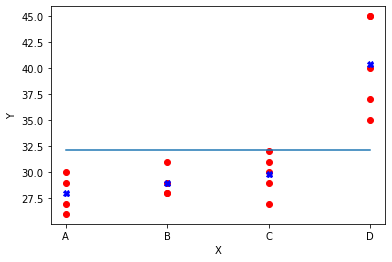

In [4]:
X0 = [min(mydata['version']),max(mydata['version'])]
Y0 = [mu,mu]
plt.plot(mydata['version'], mydata['Y'], 'o',color='red')
plt.plot(X0,Y0)
theta.plot(marker='X',linestyle='none',color='blue')
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show()

P.7

In [5]:
k=theta.shape[0]
ni=mydata.groupby('version').Y.count()
n=mydata.shape[0]
print(k)
print(ni)
print(n)

4
version
A    4
B    4
C    5
D    5
Name: Y, dtype: int64
18


In [6]:
ysq_sum=sum(mydata["Y"]**2)
ysum_sq=sum(mydata["Y"])**2
yi_sum=mydata.groupby('version').Y.sum()
print(ysq_sum)
print(ysum_sq/n)
print(yi_sum)

19215
18624.5
version
A    112
B    116
C    149
D    202
Name: Y, dtype: int64


In [7]:
sstr=sum(yi_sum**2/ni)-ysum_sq/n
sst=ysq_sum-ysum_sq/n
sse=sst-sstr
dftr=k-1
dft=n-1
dfe=dft-dftr
mstr=sstr/dftr
mse=sse/dfe
fRatio=mstr/mse
print(sstr,sse,sst)
print(dftr,dfe,dft)
print(mstr,mse)
print(fRatio)

476.5 114.0 590.5
3 14 17
158.83333333333334 8.142857142857142
19.505847953216378


In [8]:
stats.f(dftr,dfe).ppf(0.95)

3.3438886781189123

In [9]:
1-stats.f(dftr,dfe).cdf(fRatio)

2.8628489310844607e-05

P.9

In [10]:
t99=stats.t(n-k).ppf(.995)
A=np.array([[1,-1,0,0],[1,0,-1,0],[1,0,0,-1],[0,1,-1,0],[0,1,0,-1],[0,0,1,-1]])
l=A @ theta
sel=np.sqrt(mse*(np.sum(A**2/np.array(ni),axis=1)))
cl=np.c_[l-t99*sel,l+t99*sel]
print(l)
print(sel)
print(cl)

[ -1.   -1.8 -12.4  -0.8 -11.4 -10.6]
[2.01777813 1.91423241 1.91423241 1.91423241 1.91423241 1.80475562]
[[ -7.00660816   5.00660816]
 [ -7.49836884   3.89836884]
 [-18.09836884  -6.70163116]
 [ -6.49836884   4.89836884]
 [-17.09836884  -5.70163116]
 [-15.97247366  -5.22752634]]


P.10

In [11]:
t99=stats.t(n-k).ppf(.975)
A=np.array([[1,-0.5,-0.5,0]])
l=A @ theta
sel=np.sqrt(mse*(np.sum(A**2/np.array(ni),axis=1)))
cl=np.c_[l-t99*sel,l+t99*sel]
print(l)
print(sel)
print(cl)

[-1.4]
[1.71807617]
[[-5.08490689  2.28490689]]


In [12]:
t99=stats.t(n-k).ppf(.975)
A=np.array([[5,3,2,1]])/11
l=A @ theta
sel=np.sqrt(mse*(np.sum(A**2/np.array(ni),axis=1)))
cl=np.c_[l-t99*sel,l+t99*sel]
print(l)
print(sel)
print(cl)

[29.72727273]
[0.7995719]
[[28.01236155 31.4421839 ]]


Ch08, P.4

In [13]:
pd.get_dummies(mydata.version)

,A,B,C,D
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,1,0


In [14]:
mydata.head()

,version,Y
0,A,30
1,A,26
2,A,27
3,A,29
4,B,28
